## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15 minute
time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read json file
df = pd.read_json('logins.json')

In [3]:
# No null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# Set index as login_time, add 'time' column
df = df.set_index('login_time')
df['Times'] = 1

In [5]:
# Resample dataframe by 15 min
df_15min = df.resample('15min').sum()
df_15min.head()

,Times
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


### By ploting all the data, we can see that there are cycles (repetative increase and decrease). By looking into typical days (Jan 8 to Jan 11 and March 3 to March 6), we can see the login peaks around midnight and noon within a day, and lower login times were observed in the morning and afternoon.

This is probably due to the fact that the server mainly serves local users and users with 12 hour gap. For example, US and China users. This well explains the peak around 12 pm is due to local U.S. users, while the peak around 12 am is due to users in China.

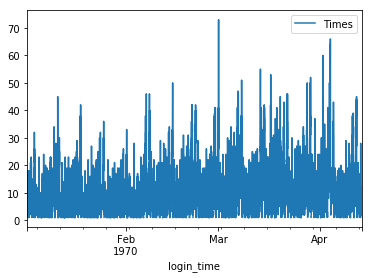

In [6]:
# Plot the data
df_15min.plot()

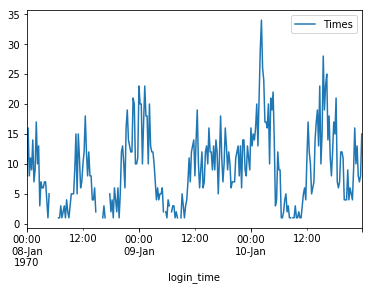

In [7]:
# Plot Jan 8 to Jan 10 data
df_15min['1970-1-8':'1970-1-10'].plot()

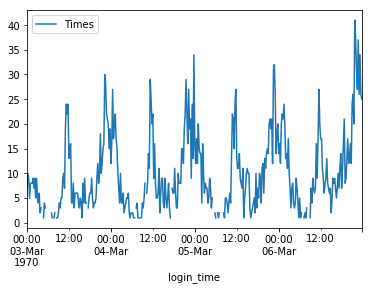

In [8]:
# Plot March 3 to March 6 data
df_15min['1970-3-3':'1970-3-6'].plot()

### If resample by day, we can also observe the weekly trend:

Login peaks in the middle of the week and lowers during weekend, which make sense

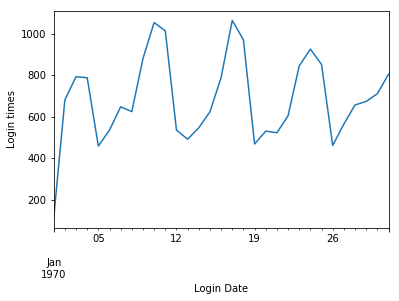

In [10]:
df_day = df.resample('D').sum()

df_day['1970-1'].plot(legend = None)
plt.ylabel('Login times')
plt.xlabel('Login Date')


***

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## Answer
1. If the experiment successes, the activities of these two cities tend to be the same. Because city activity could be measured by number of cars entering the city (more cars entering the city means more active the city), I will choose the number of cars entering the city as the key measure of success of this experiment. 

2. In order to do this, I will set cameras on the bridge recording car entry into both cities during the day and the night, and  collect two sets of data, one is the number of cars entering Gotham per hour and the other one is the number of cars entering Metropolis per hour. We also need the history data of number of cars entering both cities.

If the experiment is successful 

1) there will be higher traffic volumn on the bridge

2) the number of cars entering Gotham is higher than that entering Metropolis in the day and lower in the night. 

For 1):
Our null hypothesis is that there is no difference of traffic volumn before and after the experiment. We will test our hypothesis using t-test and calculate p-value under our null hypothesis. If p<0.025(because this is a one-tail problem), we can conclude that there is increase of traffic volume after reinbursing the toll

For 2):
Our null hypothesis is that there is no difference of number of cars entering Gotham and entering Metropolis. Similar as previous answer, we will test our null hypothesis using t-test and calculate p-value under null pothesis. If p<0.025, we can conclude number of cars entering Gotham is higher than that entering Metropolis during daytime and lower during night

If the experimenent works, more policies are needed to encourage the interaction between two cities. For example, city counsel might think of introducing public transportation system to facilitate the interaction between two cities.

***

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

##  Answer
- Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Relations between different features and rate of active users were investigated. Features showing little or no pattern with the rate of active users were droped, and features like signup_date and last_trip_date were combined to calculate user retention time. Ultimate black users, user retention time, avg dist, surge pct, avg surge and weekday pct were related with the rate of active users and used for modeling and prediction.

- Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

By projecting the data using first two principle components, we can easily see that the active users and non-active users are largely overlapped, which means the linear model could not efficiently separate the two groups. We will choose non-linear models, such as SVC with radial kernal, knn, random forest, gradient boosting trees and neuron network as examples to fit and predict the active users. Model performance was evaluated in terms of accuracy, auc score and f1-score. It turns out the gradient boosting and neuron network works best, with 81% prediction accuracy , 75% roc-auc score, and 87% f1-score. I further tune the parameters for gradient boosting (e.g., learning rate and number of trees), and found no improvement of performance.

- Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

The top 3 important factors influencing rider rentention are 'weekday_pct', 'user_days','avg_dist', which were indicated by random forest. Longterm rider will likely to be those who use the ultimate service for short trip (commute), moderate percentage of trips during a weekday, and with shorter and longer user history. The company should focus on providing more benefits to these people to retain these customers.

In [11]:
# Load the database
import json

with open('ultimate_data_challenge.json', 'r') as f:
    ultimate = json.load(f)    

ultimate_df = pd.DataFrame(ultimate)

In [12]:
# Information lost at avg_rating and phone type, we will decide later if we need to fill na values by exploring relations between
# these factors with status of activity
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Creat new column ('status') indicating the user is active or not using trips_in_first_30_days column. If the value is 0, we will label 0 as non active user, if the value is not 0, we will label 1 as active user

In [13]:
# create status column and drop trips_in_first_30_days

ultimate_df['status'] = ultimate_df.trips_in_first_30_days.apply(lambda x: 0 if x ==0 else 1)

ultimate_df.drop('trips_in_first_30_days', inplace = True, axis = 1)

## EDA

Herein, I explored the relationship between active status and black_user/user retention time/avg dist/rating/surge pct/avg surge/weekday pct/city/phone type. The followings are my observations:

**1. Being an ultimate black user will increase the rate of activate users**

   Because ultimate black users typically have good experience of the program and tend to stay active.
   
**2. If user stays shorter or longer with the program, the user is more likely to stay active**

   If user stays shorter with the program, he/she will tend to stay longer to experience more with the program, and for those users who stay longer with the program, they are loyalty to the program and also will be active users
   
**3. The lower the avg dist, the higher rate of activate users**

Lower avg dist means shorter trip, which indicates the users use this for commute. The users are more likely to stay active than people only using ultimate for longer trip

**4. Rating, city and phone type does not have influence the the rate of activate users**

**5. Lower surge pct and higher avg surge will increase the rate of activate users**

Lower surge pct indicates lower fare, it will increase the rate of active users. Higher avg surge indicates users are from high demanding area, which tends to have the higher rate of active users.

**6. Lower or higher weekday pct will decrease the rate of active users**
Lower weekday pct means the user does not use ultimate service very often, higher weekday pct means the user use ultimate service too often. Both cases are not good to increase the rate of active users, because in former case, users are not interested in the ultimate program, and in later case, users might choose althernative programs other than ultimate program




#### Being black user will increase the activate rate

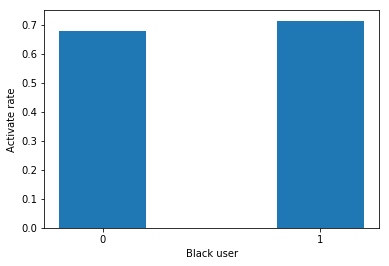

In [14]:
black_user = ultimate_df.groupby('ultimate_black_user')['status'].mean()

plt.bar(black_user.index, black_user.values, width=0.4)
plt.xticks([0,1])
plt.xlabel('Black user')
plt.ylabel('Activate rate')

#### If user stays shorter or longer with the program, the user is more likely to stay active

In [15]:
ultimate_df.last_trip_date = pd.to_datetime(ultimate_df.last_trip_date)
ultimate_df.signup_date = pd.to_datetime(ultimate_df.signup_date)

In [16]:
days_diff = (ultimate_df.last_trip_date-ultimate_df.signup_date).apply(lambda x: x.days)
days_diff_qcut = pd.qcut(days_diff, 10, labels=range(1,11))

In [17]:
days_diff_status = pd.concat([days_diff_qcut, ultimate_df.status],axis=1).groupby(0).mean()

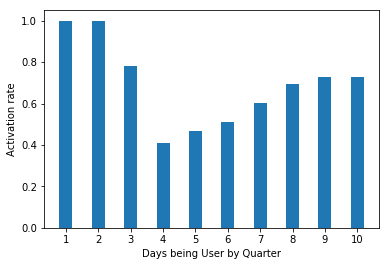

In [18]:
# For those with shorter and longer users, the rate of activation is relatively higher 
plt.bar(days_diff_status.index, days_diff_status.values, width=0.4)
_ = plt.xticks(range(1,11))
plt.xlabel('Days being User by Quarter')
plt.ylabel('Activation rate')

#### The lower the avg dist, the higher rate of activate users

In [19]:
avg_dist_status = pd.concat([ultimate_df.avg_dist//10,ultimate_df.status],axis = 1).groupby('avg_dist').mean()

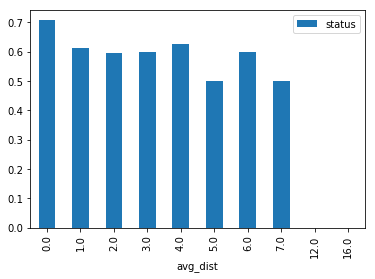

In [20]:
avg_dist_status.plot(kind='bar')

#### Lower surge_pct and higher avg_surge have higher rate of active users

<Container object of 10 artists>

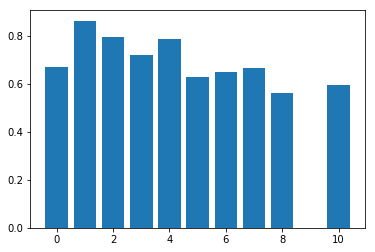

In [21]:
surge_pct_status = pd.concat([ultimate_df.surge_pct//10,ultimate_df.status],axis = 1).groupby('surge_pct').mean()

plt.bar(surge_pct_status.index, surge_pct_status.values)

<Container object of 6 artists>

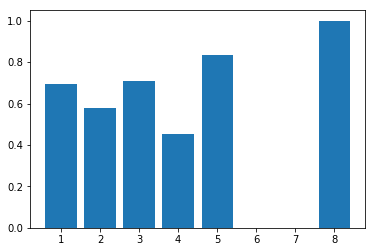

In [22]:
avg_surge_status = pd.concat([ultimate_df.avg_surge//1,ultimate_df.status],axis = 1).groupby('avg_surge').mean()

plt.bar(avg_surge_status.index, avg_surge_status.values)

#### Lower or higher weekday_pct leads to lower rate of active users

<Container object of 11 artists>

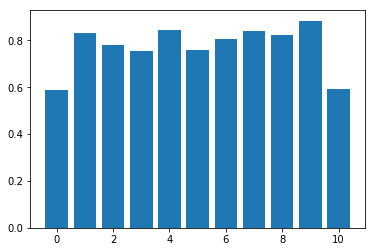

In [23]:
weekday_pct_status = pd.concat([ultimate_df.weekday_pct//10,ultimate_df.status],axis = 1).groupby('weekday_pct').mean()

plt.bar(weekday_pct_status.index, weekday_pct_status.values)

#### Rating, city and phone type does not have influence the the rate of activate users

<Container object of 5 artists>

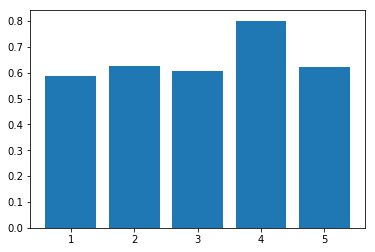

In [24]:
# rating_by_driver relation with status
rating_driver_status = pd.concat([ultimate_df.avg_rating_by_driver//1,ultimate_df.status],axis = 1).groupby('avg_rating_by_driver').mean()

plt.bar(rating_driver_status.index, rating_driver_status.values)

<Container object of 5 artists>

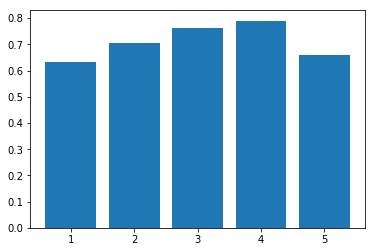

In [25]:
# rating of driver relation with status
rating_of_driver_status = pd.concat([ultimate_df.avg_rating_of_driver//1,ultimate_df.status],axis = 1).groupby('avg_rating_of_driver').mean()

plt.bar(rating_of_driver_status.index, rating_of_driver_status.values)

([<matplotlib.axis.XTick at 0x1e017643080>,
 <a list of 3 Text xticklabel objects>)

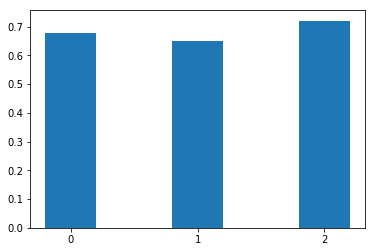

In [26]:
# City relation with status
city_status = ultimate_df.groupby('city')['status'].mean()

plt.bar(range(3), city_status.values, width = 0.4)
plt.xticks(range(3))

In [27]:
# Phone type does not have influence on the activation status, we will drop the column
ultimate_df.groupby('phone')['status'].mean()

phone
Android    0.692651
iPhone     0.690735
Name: status, dtype: float64

##  Data Cleaning

In [28]:
# Drop no neccessary columns
ultimate_df.drop(['avg_rating_by_driver','avg_rating_of_driver','phone','last_trip_date','signup_date'], axis = 1, inplace=True)

In [29]:
# Creat 'user_days' recording user retention time
ultimate_df['user_days'] = days_diff_qcut

# Convert column 'ultimate_black_user' from bool value to int values
ultimate_df.ultimate_black_user = ultimate_df.ultimate_black_user.apply(lambda x: 1 if x else 0)

# Label city terms as 1, 2, and 3
city_map = {"King's Landing":1, 'Astapor':2, 'Winterfell':3}

ultimate_df.city = ultimate_df.city.map(city_map)

# Seperate avg_dist into 10 parts
ultimate_df.avg_dist = pd.qcut(ultimate_df.avg_dist, 10, labels = range(1,11))

# Seperate avg_surge into 8 parts
ultimate_df.avg_surge = ultimate_df.avg_surge//1

# Separate surge_pct into 10 parts
ultimate_df.surge_pct = ultimate_df.surge_pct//10

# Separate weekday_pct into 10 parts
ultimate_df.weekday_pct = ultimate_df.weekday_pct//10

In [30]:
# Convert columns to int type
for i in ultimate_df.columns:
    ultimate_df[i] = ultimate_df[i].astype(int)
    
# Make sure no null values
assert ultimate_df.isnull().sum().sum()==0

In [32]:
ultimate_df.head()

,avg_dist,avg_surge,city,surge_pct,ultimate_black_user,weekday_pct,status,user_days
0,5,1,1,1,1,4,1,7
1,9,1,2,0,0,5,0,5
2,1,1,2,0,0,10,1,1
3,3,1,1,2,1,8,1,10
4,4,1,3,1,0,8,1,4


## Modeling and Prediction

In this part, I compared the performance of random forest, knn, svc, gradient boosting, and neuron network. I found gradient boosting and neuron network performs best in terms of prediction accuracy (81%), roc-auc score (75%), and f1-score (87%). For this project, the ultimate will care more on the accuracy of prediction given the user is active. By adjusting the threshold of prediction to be lower (e.g., 0.4), we can increase the true positive rate with sacrificing the true negative rate.

In [33]:
# Import model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve

# Define model evaluation method
def model_test(model, ytest, y_predict):
    print('The accuracy of {} model is: {:.2f}'.format(model, accuracy_score(ytest, y_predict)))
    print('The confusion matrix is:\n{}'.format(confusion_matrix(ytest, y_predict)))
    print('The auc score is: {:.2f}'.format(roc_auc_score(ytest, y_predict)))
    print('The F1-score is: {:.2f}'.format(f1_score(ytest, y_predict)))

# Define auc plotting method
def plot_roc(model, ytest, y_predict, y_predict_prob):
    fpr, tpr, _ = roc_curve(ytest, y_predict_prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label = 'AUC score by {}: {:.2f}'.format(model, roc_auc_score(ytest, y_predict)))
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'best')
    plt.xlim(0,1)
    plt.ylim(0,1)

In [34]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

xdata = ultimate_df.drop('status', axis = 1).values
ydata = ultimate_df.status

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state= 1)

#### Data Visuallization

In [35]:
from sklearn.decomposition import PCA
xdata_transform = PCA().fit_transform(xdata)

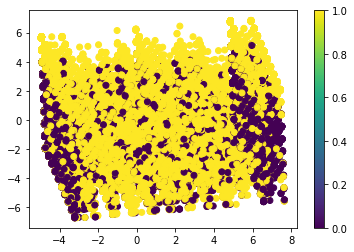

In [36]:
# Visualize the data, notice the active users and non active users are highly overlaped
plt.scatter(xdata_transform[:,0],xdata_transform[:,1], c = ydata)
plt.colorbar()

#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
rf_predict = rf.predict(xtest)
rf_predict_prob = rf.predict_proba(xtest)[:,1]

In [38]:
model_test('Random Forest', ytest, rf_predict)

The accuracy of Random Forest model is: 0.78
The confusion matrix is:
[[2871 1741]
 [1564 8824]]
The auc score is: 0.74
The F1-score is: 0.84


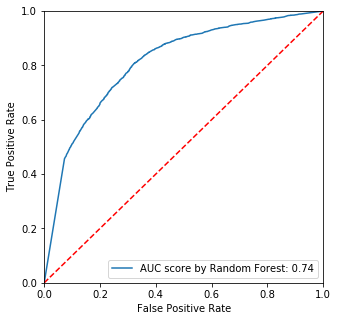

In [39]:
plot_roc('Random Forest',ytest, rf_predict,rf_predict_prob)

In [40]:
ultimate_df.columns

Index(['avg_dist', 'avg_surge', 'city', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'status', 'user_days'],
      dtype='object')

In [41]:
rf.feature_importances_

array([ 0.14622092,  0.00393443,  0.03164536,  0.07870204,  0.01499312,
        0.27165309,  0.45285105])

'weekday_pct', 'user_days','avg_dist','surge_pct'

#### SVC

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [43]:
# Scale the data
scale = StandardScaler()
scale.fit(xtrain)
xtrain_transform = scale.transform(xtrain)
xtest_transform = scale.transform(xtest)

C:\Users\Liu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [44]:
svc = SVC()
svc.fit(xtrain_transform, ytrain)

svc_predict = svc.predict(xtest_transform)

In [45]:
model_test('SVC', ytest, svc_predict)

The accuracy of SVC model is: 0.80
The confusion matrix is:
[[2671 1941]
 [1079 9309]]
The auc score is: 0.74
The F1-score is: 0.86


#### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
knn_predict = knn.predict(xtest)
knn_predict_prob = knn.predict_proba(xtest)[:,1]

In [48]:
model_test('knn', ytest, knn_predict)

The accuracy of knn model is: 0.78
The confusion matrix is:
[[2697 1915]
 [1419 8969]]
The auc score is: 0.72
The F1-score is: 0.84


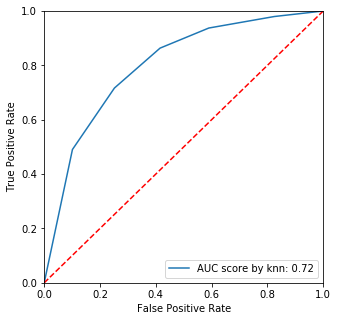

In [49]:
plot_roc('knn', ytest, knn_predict, knn_predict_prob)

#### Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
gb_predict = gb.predict(xtest)
gb_predict_prob = gb.predict_proba(xtest)[:,1]

In [52]:
model_test('Gradient Boosting', ytest, gb_predict)

The accuracy of Gradient Boosting model is: 0.81
The confusion matrix is:
[[2806 1806]
 [1069 9319]]
The auc score is: 0.75
The F1-score is: 0.87


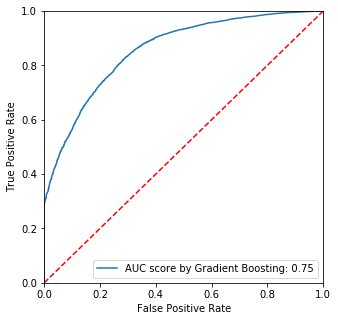

In [53]:
plot_roc('Gradient Boosting', ytest, gb_predict, gb_predict_prob)

In [54]:
# Reduce the threshold to be 0.4, which increase the true positive rate
model_test('Threshould tuned gradient boosting',ytest, (gb_predict_prob>0.4).astype(int))

The accuracy of Threshould tuned gradient boosting model is: 0.81
The confusion matrix is:
[[2586 2026]
 [ 870 9518]]
The auc score is: 0.74
The F1-score is: 0.87


In [55]:
# Tried to tune parameters such as learning rate and number of trees, got similar results as default parameters
#param = {'learning_rate':10.0**np.arange(-3, 1), 'n_estimators':[50,100, 200, 500]}
#clf = GridSearchCV(GradientBoostingClassifier(), param)
#clf.fit(xtrain, ytrain)

#### Neuron Network

In [56]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500)
mlp.fit(xtrain_transform, ytrain)

mlp_predict = mlp.predict(xtest_transform)
mlp_predict_prob = mlp.predict_proba(xtest_transform)[:,1]

In [57]:
model_test('Neuron Network', ytest, mlp_predict)

The accuracy of Neuron Network model is: 0.81
The confusion matrix is:
[[2759 1853]
 [1062 9326]]
The auc score is: 0.75
The F1-score is: 0.86


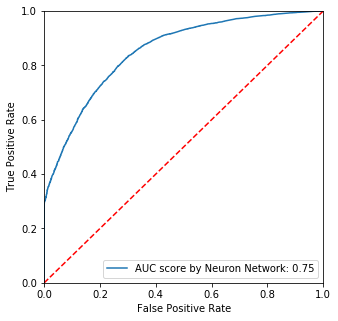

In [58]:
plot_roc('Neuron Network', ytest, mlp_predict, mlp_predict_prob)

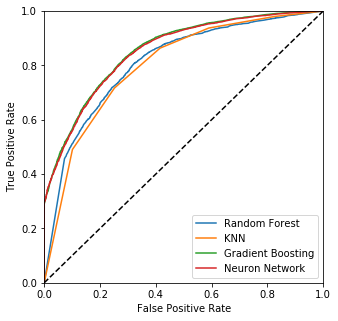

In [59]:
# Comparison of ROC curve for four types of models, it is indicated gradient boosting and neuron network provide the highest AUC score
plt.figure(figsize=(5,5))
for i,j in zip([rf_predict_prob, knn_predict_prob, gb_predict_prob, mlp_predict_prob], 
               ['Random Forest', 'KNN', 'Gradient Boosting', 'Neuron Network']):
    fpr, tpr, _ = roc_curve(ytest, i)
    plt.plot(fpr, tpr, label = j)
plt.legend(loc = 'best')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')